In [337]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import plotly_express as px

pd.options.display.float_format='{:.2f}'.format
pd.options.display.max_columns=None
pd.options.display.max_rows=None

In [338]:
import pandas as pd

def wrangle(filename, encoding=None, date_column=None, dropna_nan_columns=[],dropna_nan_columns0=False, change_column_name={}, drop_duplicates_columns=None ):
    global df
    df = pd.read_csv(filename, encoding=encoding)  # Load the dataset

    # Clean column names: remove spaces and convert to lowercase
    df.columns = df.columns.str.strip().str.lower()

    # convert space to _
    df.columns=df.columns.str.replace(' ','_')


    # Convert the specified column to datetime if provided
    if date_column:
        df[date_column] = pd.to_datetime(df[date_column]) 

    # # Drop all columns that contain only NaN values    
    if dropna_nan_columns0:
        df=df.dropna(axis=1 , how='all')    
    
    # Drop rows with NaN values in the specified columns
    if dropna_nan_columns:
        df.dropna(subset=dropna_nan_columns, inplace=True)
    
    # Rename columns if a mapping is provided
    if change_column_name:
        df.rename(columns=change_column_name, inplace=True)
    
    # Remove duplicate rows based on specified columns
    if drop_duplicates_columns:
        df.drop_duplicates(subset=drop_duplicates_columns, inplace=True)

    return df


In [339]:
df=wrangle('sales_data.csv',date_column='sale_date')
df

,product_id,product_name,category,price,quantity_sold,sale_date
0,1,Laptop,Electronics,1200,50,2023-01-10
1,2,Mouse,Accessories,25,200,2023-01-15
2,3,Keyboard,Accessories,45,150,2023-01-20
3,4,Monitor,Electronics,300,75,2023-02-05
4,5,Printer,Electronics,150,40,2023-02-10
5,6,Webcam,Accessories,70,90,2023-03-01


In [340]:
df['revenue']=df['price']*df['quantity_sold']


In [341]:
df=df[['product_id', 'product_name', 'category', 'price', 'quantity_sold', 'revenue',
       'sale_date']]

# تحديد المنتج صاحب أعلى إيرادات

In [342]:
df.head()

,product_id,product_name,category,price,quantity_sold,revenue,sale_date
0,1,Laptop,Electronics,1200,50,60000,2023-01-10
1,2,Mouse,Accessories,25,200,5000,2023-01-15
2,3,Keyboard,Accessories,45,150,6750,2023-01-20
3,4,Monitor,Electronics,300,75,22500,2023-02-05
4,5,Printer,Electronics,150,40,6000,2023-02-10


In [343]:
highest_revenue_product = df.loc[df['revenue'].idxmax()]
highest_revenue_product


product_id                         1
product_name                  Laptop
category                 Electronics
price                           1200
quantity_sold                     50
revenue                        60000
sale_date        2023-01-10 00:00:00
Name: 0, dtype: object

# حساب اجمالي الإيرادات لكل فئة category

In [344]:
df

,product_id,product_name,category,price,quantity_sold,revenue,sale_date
0,1,Laptop,Electronics,1200,50,60000,2023-01-10
1,2,Mouse,Accessories,25,200,5000,2023-01-15
2,3,Keyboard,Accessories,45,150,6750,2023-01-20
3,4,Monitor,Electronics,300,75,22500,2023-02-05
4,5,Printer,Electronics,150,40,6000,2023-02-10
5,6,Webcam,Accessories,70,90,6300,2023-03-01


In [345]:
df.groupby('category')['revenue'].sum().reset_index()

,category,revenue
0,Accessories,18050
1,Electronics,88500


# تحديد الفئة الأكثر مبيعاً

In [346]:
df

,product_id,product_name,category,price,quantity_sold,revenue,sale_date
0,1,Laptop,Electronics,1200,50,60000,2023-01-10
1,2,Mouse,Accessories,25,200,5000,2023-01-15
2,3,Keyboard,Accessories,45,150,6750,2023-01-20
3,4,Monitor,Electronics,300,75,22500,2023-02-05
4,5,Printer,Electronics,150,40,6000,2023-02-10
5,6,Webcam,Accessories,70,90,6300,2023-03-01


In [347]:
df.groupby('category')['quantity_sold'].sum().reset_index()

,category,quantity_sold
0,Accessories,440
1,Electronics,165


# حساب إجمالي الإيرادات الشهرية

In [348]:
df

,product_id,product_name,category,price,quantity_sold,revenue,sale_date
0,1,Laptop,Electronics,1200,50,60000,2023-01-10
1,2,Mouse,Accessories,25,200,5000,2023-01-15
2,3,Keyboard,Accessories,45,150,6750,2023-01-20
3,4,Monitor,Electronics,300,75,22500,2023-02-05
4,5,Printer,Electronics,150,40,6000,2023-02-10
5,6,Webcam,Accessories,70,90,6300,2023-03-01


In [349]:
date_index=df.set_index('sale_date')
total_revenue_per_mounth=date_index['revenue'].resample('1ME').sum()
total_revenue_per_mounth.reset_index()



,sale_date,revenue
0,2023-01-31,71750
1,2023-02-28,28500
2,2023-03-31,6300


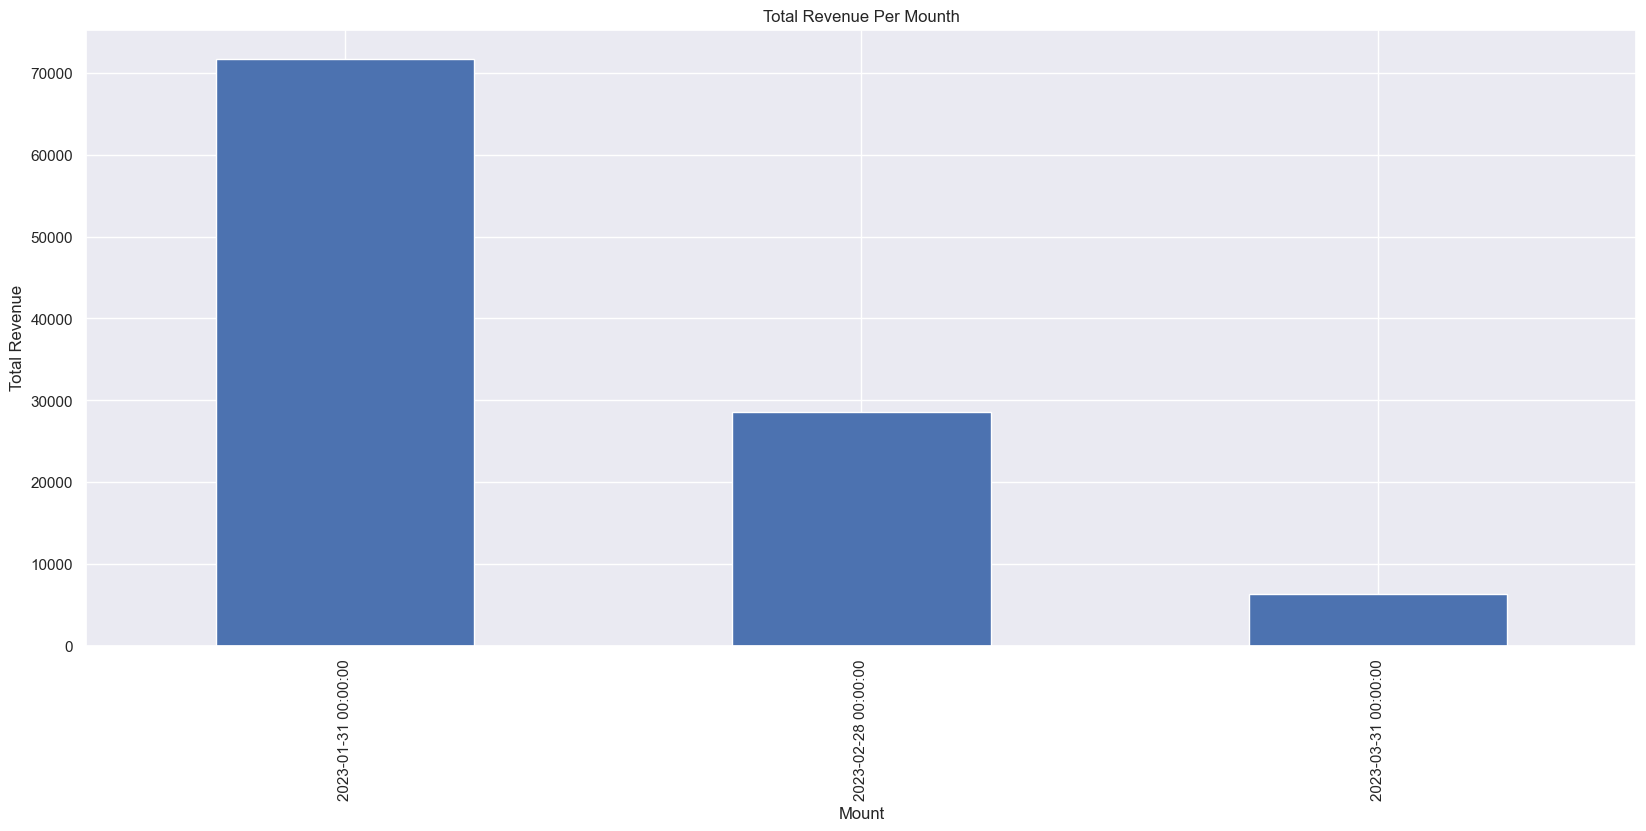

In [350]:
total_revenue_per_mounth.plot(kind='bar' , x='sale_date' , y='revenue' , figsize=(20,8))
plt.title('Total Revenue Per Mounth')
plt.xlabel('Mount')
plt.ylabel('Total Revenue')
plt.show()

# تحديد المنتجات التي باعت أقل من مئة وحدة

In [351]:
df

,product_id,product_name,category,price,quantity_sold,revenue,sale_date
0,1,Laptop,Electronics,1200,50,60000,2023-01-10
1,2,Mouse,Accessories,25,200,5000,2023-01-15
2,3,Keyboard,Accessories,45,150,6750,2023-01-20
3,4,Monitor,Electronics,300,75,22500,2023-02-05
4,5,Printer,Electronics,150,40,6000,2023-02-10
5,6,Webcam,Accessories,70,90,6300,2023-03-01


# تحديد المنتجات التي باعت أقل من 100 قطعة

In [352]:
lower_100_quantity=df.loc[df['quantity_sold']<100]
lower_100_quantity

,product_id,product_name,category,price,quantity_sold,revenue,sale_date
0,1,Laptop,Electronics,1200,50,60000,2023-01-10
3,4,Monitor,Electronics,300,75,22500,2023-02-05
4,5,Printer,Electronics,150,40,6000,2023-02-10
5,6,Webcam,Accessories,70,90,6300,2023-03-01
